# IMAGE CLASSIFICATION

Here, we try to classify images as Buildings, Sea, Glaciers, Mountains, Forests or Streets based on already labeled images of the same. Using these predictions, one can leverage hotel recommendations, travel suggestions, or even help in automa

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_hub as hub

# Visualize Images

In [4]:
trainim=tf.keras.preprocessing.image_dataset_from_directory(
    directory='111880_269359_bundle_archive/seg_train/seg_train',image_size=(150,150),batch_size=32,shuffle=True)

Found 14034 files belonging to 6 classes.


In [5]:
class_names=trainim.class_names

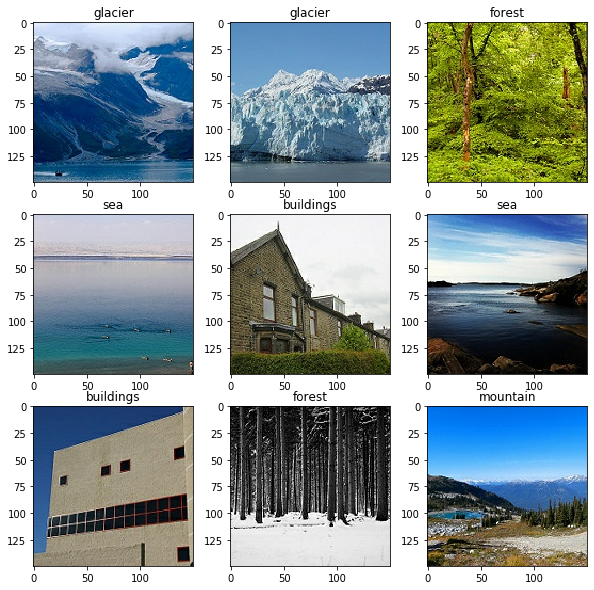

In [6]:
plt.figure(figsize=(10,10))
for image,label in trainim.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[int(label[i])])

# Image Augmentation

Here, we take multiple interpretations of the images, such as rotation, zoom-in, etc. so that we can feed the model more details about the image.

In [7]:
train_tr=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.5,shear_range=0.2,
                            height_shift_range=0.15,width_shift_range=0.15)
train_dir=train_tr.flow_from_directory(directory='111880_269359_bundle_archive/seg_train/seg_train',target_size=(150,150),
                                      batch_size=32,shuffle=True,class_mode='sparse')
valid_tr=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_dir=valid_tr.flow_from_directory(directory='111880_269359_bundle_archive/seg_test/seg_test',
                                      target_size=(150,150),
                                      batch_size=32,shuffle=True,class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Artificial Neural Network Layer Building 

Here we build the layers of the Artificial Neural Network with images of size 150X150X3. A simple Neural Network may not yield the desired accuracy, as it does not capture the intimate details of an image.

In [18]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Flatten())
ann.add(tf.keras.layers.Dense(256,activation='relu',input_shape=(150,150,3)))
ann.add(tf.keras.layers.Dense(128,activation='relu'))
ann.add(tf.keras.layers.Dense(64,activation='relu'))
ann.add(tf.keras.layers.Dense(32,'relu'))
ann.add(tf.keras.layers.Dense(6,activation='softmax'))

In [19]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

# ANN Training

In [20]:
model1=ann.fit(train_dir,epochs=25,validation_data=valid_dir)

Epoch 1/25
439/439 [==============================] - 194s 442ms/step - loss: 2.3257 - accuracy: 0.3604 - val_loss: 1.3774 - val_accuracy: 0.4753
Epoch 2/25
439/439 [==============================] - 191s 436ms/step - loss: 1.4067 - accuracy: 0.4545 - val_loss: 1.3533 - val_accuracy: 0.4800
Epoch 3/25
439/439 [==============================] - 186s 425ms/step - loss: 1.3702 - accuracy: 0.4644 - val_loss: 1.3512 - val_accuracy: 0.4683
Epoch 4/25
439/439 [==============================] - 186s 424ms/step - loss: 1.3295 - accuracy: 0.4848 - val_loss: 1.3358 - val_accuracy: 0.4803
Epoch 5/25
439/439 [==============================] - 181s 412ms/step - loss: 1.2857 - accuracy: 0.5026 - val_loss: 1.2706 - val_accuracy: 0.4950
Epoch 6/25
439/439 [==============================] - 175s 398ms/step - loss: 1.2765 - accuracy: 0.5019 - val_loss: 1.2452 - val_accuracy: 0.5210
Epoch 7/25
439/439 [==============================] - 175s 399ms/step - loss: 1.2745 - accuracy: 0.5036 - val_loss: 1.2679 -

# Convolutional Neural Network Layer Building

Here, we build a Convolutional Neural Network by adding in several Conv2D layers with Kernel Filters of size 3X3. We also add in a Dropout Layer to prevent overfitting. Again, the images are augmented to capture every aspect of it, and the size of each image is 150X150X3.

In [9]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(64,3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(128,3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512,activation='relu'))
cnn.add(tf.keras.layers.Dense(364,activation='relu'))
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.Dense(64,activation='relu'))
cnn.add(tf.keras.layers.Dense(6,activation='softmax'))

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [11]:
model2=cnn.fit(train_dir,epochs=25,validation_data=valid_dir,shuffle=True)

Epoch 1/25
439/439 [==============================] - 454s 1s/step - loss: 1.1285 - accuracy: 0.5504 - val_loss: 0.8549 - val_accuracy: 0.6817
Epoch 2/25
439/439 [==============================] - 456s 1s/step - loss: 0.8912 - accuracy: 0.6679 - val_loss: 0.6934 - val_accuracy: 0.7583
Epoch 3/25
439/439 [==============================] - 453s 1s/step - loss: 0.7741 - accuracy: 0.7081 - val_loss: 0.6277 - val_accuracy: 0.7683
Epoch 4/25
439/439 [==============================] - 453s 1s/step - loss: 0.6837 - accuracy: 0.7510 - val_loss: 0.5116 - val_accuracy: 0.8293
Epoch 5/25
439/439 [==============================] - 459s 1s/step - loss: 0.6390 - accuracy: 0.7673 - val_loss: 0.5766 - val_accuracy: 0.7997
Epoch 6/25
439/439 [==============================] - 542s 1s/step - loss: 0.5942 - accuracy: 0.7821 - val_loss: 0.4537 - val_accuracy: 0.8427
Epoch 7/25
439/439 [==============================] - 456s 1s/step - loss: 0.5803 - accuracy: 0.7887 - val_loss: 0.5056 - val_accuracy: 0.8163

# Transfer Learning using MobileNet v2

In [14]:
img_gen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
trainimg=img_gen.flow_from_directory('111880_269359_bundle_archive/seg_train/seg_train',target_size=(224,224))
test_gen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testimg=img_gen.flow_from_directory('111880_269359_bundle_archive/seg_test/seg_test',target_size=(224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [15]:
url="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
feature_extractor=hub.KerasLayer(url,input_shape=(224,224,3))
feature_extractor.trainable=False
tl=tf.keras.Sequential([feature_extractor,
                        tf.keras.layers.Dense(256,activation='relu'),
                        tf.keras.layers.Dense(128,activation='relu'),
                          tf.keras.layers.Dense(64,activation='relu'),
                        tf.keras.layers.Dense(6,activation='softmax')])
tl.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model3=tl.fit(trainimg,epochs=25,validation_data=testimg)

Epoch 1/25
439/439 [==============================] - 658s 1s/step - loss: 1.1714 - accuracy: 0.8727 - val_loss: 1.1496 - val_accuracy: 0.8943
Epoch 2/25
439/439 [==============================] - 634s 1s/step - loss: 1.1378 - accuracy: 0.9054 - val_loss: 1.1663 - val_accuracy: 0.8750
Epoch 3/25
439/439 [==============================] - 739s 2s/step - loss: 1.1430 - accuracy: 0.9000 - val_loss: 1.1449 - val_accuracy: 0.8983
Epoch 4/25
439/439 [==============================] - 733s 2s/step - loss: 1.1334 - accuracy: 0.9096 - val_loss: 1.1679 - val_accuracy: 0.8750
Epoch 5/25
439/439 [==============================] - 809s 2s/step - loss: 1.1290 - accuracy: 0.9141 - val_loss: 1.1324 - val_accuracy: 0.9103
Epoch 6/25
439/439 [==============================] - 822s 2s/step - loss: 1.1368 - accuracy: 0.9062 - val_loss: 1.1281 - val_accuracy: 0.9157
Epoch 7/25
439/439 [==============================] - 768s 2s/step - loss: 1.1331 - accuracy: 0.9102 - val_loss: 1.1495 - val_accuracy: 0.8937

# Performance Plot

Text(0.5, 1.0, 'Transfer Learning')

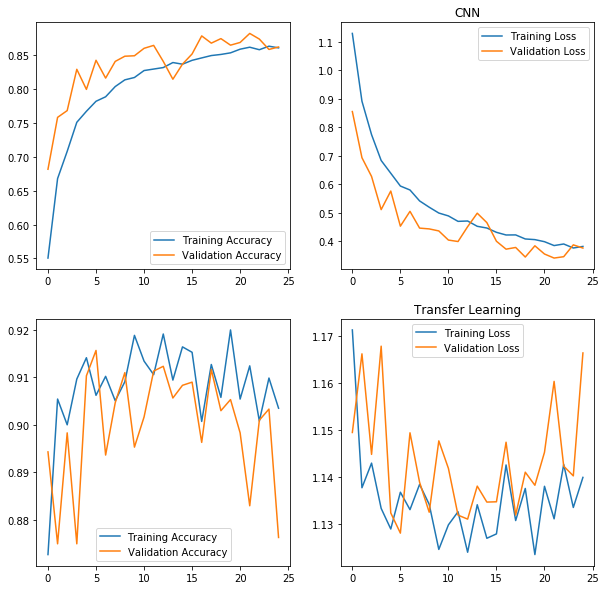

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(model2.history['accuracy'],label='Training Accuracy')
plt.plot(model2.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(2,2,2)
plt.plot(model2.history['loss'],label='Training Loss')
plt.plot(model2.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('CNN')
plt.subplot(2,2,3)
plt.plot(model3.history['accuracy'],label='Training Accuracy')
plt.plot(model3.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(2,2,4)
plt.plot(model3.history['loss'],label='Training Loss')
plt.plot(model3.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Transfer Learning')

The Accuracy and Loss Plot of the Transfer Learning model are like mirrors to each other. As expected, the Transfer Learning model does better on average, as it has been obtained after training on several tons of data. The CNN model does better too, and has a smoother curve in each case.

# Prediction on a set of images

In [29]:
import os
images=[]
path='111880_269359_bundle_archive/seg_pred/seg_pred'
for img in os.listdir(path):
    img=os.path.join(path,img)
    img=keras.preprocessing.image.load_img(img,target_size=(224,224))
    img=keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    images.append(img)
print(len(images))
    

7301


In [32]:
test=images[:9]

In [33]:
predictions=[]
for image in test:
    pred=tl.predict(image)
    pred=np.argmax(pred)
    predictions.append(pred)

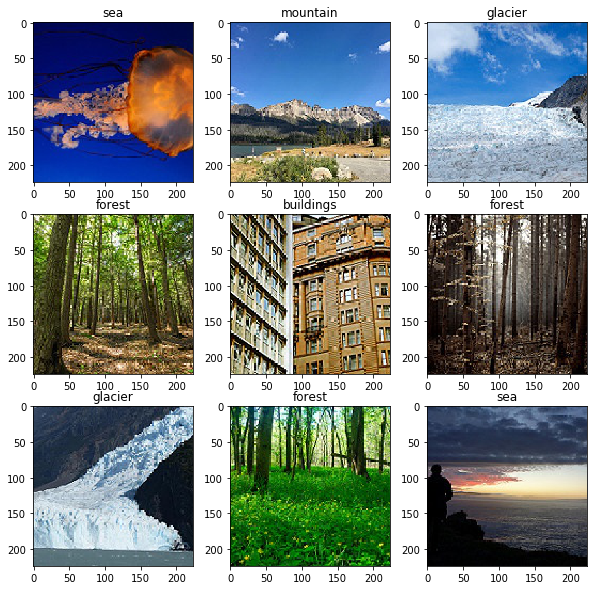

In [37]:
plt.figure(figsize=(10,10))
for i,image in enumerate(test):
    plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(class_names[predictions[i]])

We'd ultimately go with the Transfer Learning Model using MobileNet V2, since the results speak for themselves.
We ended up with a validation accuracy of about 90% and can thus predict any kind of scenic location almost perfectly.